In [3]:
# --- Zoo_Hyrax Project: Python Phase ---
# Exploratory Data Analysis (EDA), Statistics, and Machine Learning
# Author: Sam Breen

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configure settings
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

# Load dataset
df = pd.read_excel("zoohyrax_master.xlsx")

# Preview data
df.head()


,Species,Weight (kg),Length (cm),Diet,Habitat,IUCN Status,Population,Category
0,rock_hyrax,4.5,55,Herbivore,rocky,Least Concern,50000,Hyrax
1,bush_hyrax,3.8,45,Herbivore,savanna,Near Threatened,12000,Hyrax
2,tree_hyrax,2.9,42,Herbivore,forest,Vulnerable,5000,Hyrax
3,meerkat,1.0,25,Omnivore,savanna,Least Concern,25000,Meerkat
4,african_elephant,5400.0,700,Herbivore,savanna,Endangered,415000,Elephant


## 🧹 Section 2 — Data Cleaning & Preparation
This section ensures the dataset is accurate and consistent before analysis.  
Each operation below is commented in plain English to make the workflow understandable, even for readers new to Python.


In [5]:
# --- Section 2: Data Cleaning & Preparation ---
# This step ensures our dataset is tidy, complete, and consistent.
# We'll check for missing values, standardise text formatting,
# handle duplicates, and inspect for potential data issues.

# 1️⃣ View dataset size and structure
# .shape gives (rows, columns); .info() shows data types and null counts
print("Rows:", df.shape[0], " | Columns:", df.shape[1])
df.info()

# 2️⃣ Check for missing values in each column
# isnull().sum() counts how many nulls each column has
print("\nMissing values per column:")
print(df.isnull().sum())

# 3️⃣ Handle missing numeric values
# Example: replace missing population estimates with the median (middle value)
# We use median instead of mean because it's less affected by extreme outliers.
if 'population_estimate' in df.columns:
    df['population_estimate'] = df['population_estimate'].fillna(df['population_estimate'].median())

# 4️⃣ Standardise text data
# Loops through all text (object) columns and applies:
# - str.strip(): removes extra spaces
# - str.title(): converts text to Title Case (e.g. "savannah" → "Savannah")
text_cols = df.select_dtypes(include='object').columns
for col in text_cols:
    # Adding the missing loop body
    df[col] = df[col].str.strip().str.title()

Rows: 10  | Columns: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      10 non-null     object 
 1   Weight (kg)  10 non-null     float64
 2   Length (cm)  10 non-null     int64  
 3   Diet         10 non-null     object 
 4   Habitat      10 non-null     object 
 5   IUCN Status  10 non-null     object 
 6   Population   10 non-null     int64  
 7   Category     10 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 772.0+ bytes

Missing values per column:
Species        0
Weight (kg)    0
Length (cm)    0
Diet           0
Habitat        0
IUCN Status    0
Population     0
Category       0
dtype: int64


## 📊 Section 3 — Exploratory Data Analysis (EDA)

EDA helps us understand the story behind the data — identifying trends, variability, and possible relationships between features.  
Below, we use plots and descriptive statistics to explore population differences across regions and habitats, and to see how numeric features relate to each other.


In [7]:
# See all column names in your DataFrame
print(df.columns.tolist())


['Species', 'Weight (kg)', 'Length (cm)', 'Diet', 'Habitat', 'IUCN Status', 'Population', 'Category']


In [8]:
# Clean and simplify column names for easier use in Python
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Confirm new column names
print(df.columns.tolist())


['species', 'weight_(kg)', 'length_(cm)', 'diet', 'habitat', 'iucn_status', 'population', 'category']


Dataset shape: (10, 8)
Column names: ['species', 'weight_(kg)', 'length_(cm)', 'diet', 'habitat', 'iucn_status', 'population', 'category']


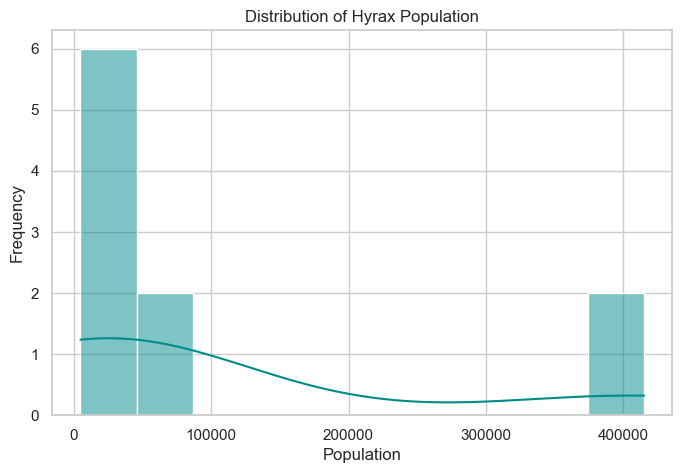

C:\Users\sambr\AppData\Local\Temp\ipykernel_12008\1644559596.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='habitat', y='population', data=df, palette='Set2')


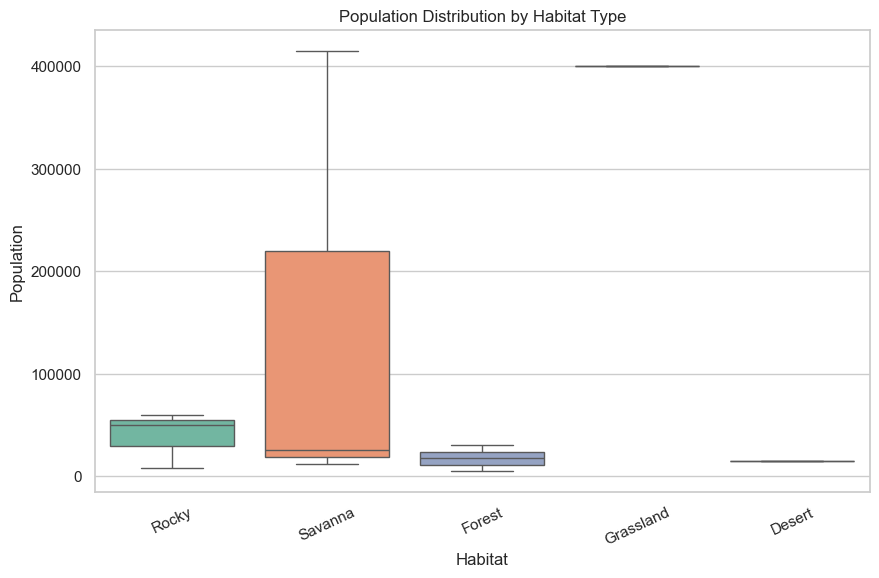

C:\Users\sambr\AppData\Local\Temp\ipykernel_12008\1644559596.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='diet', y='population', data=df, ci=None, palette='viridis')
C:\Users\sambr\AppData\Local\Temp\ipykernel_12008\1644559596.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='diet', y='population', data=df, ci=None, palette='viridis')


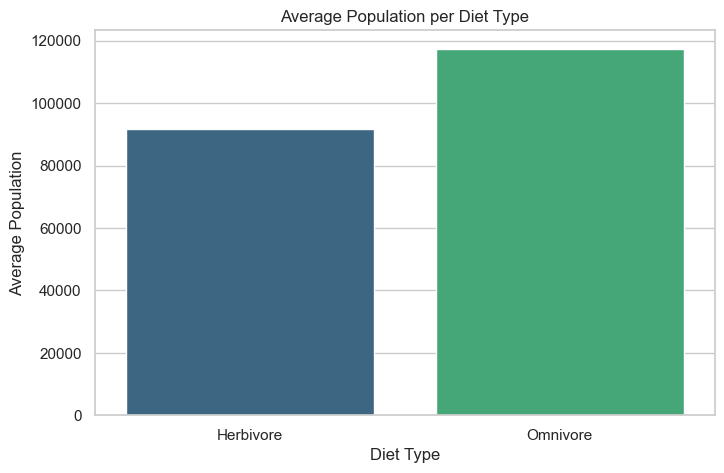

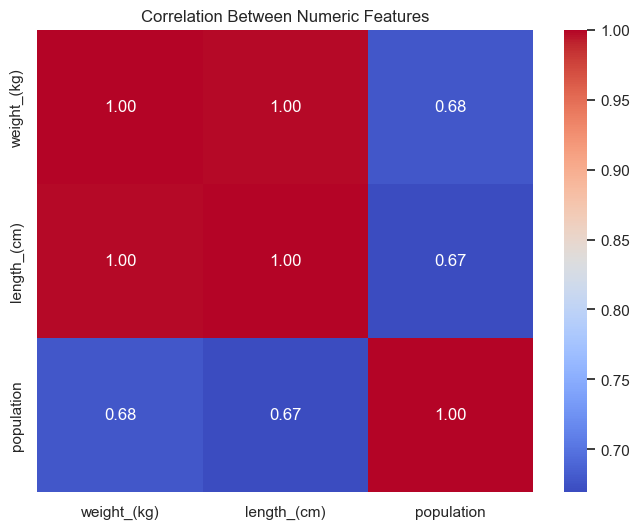

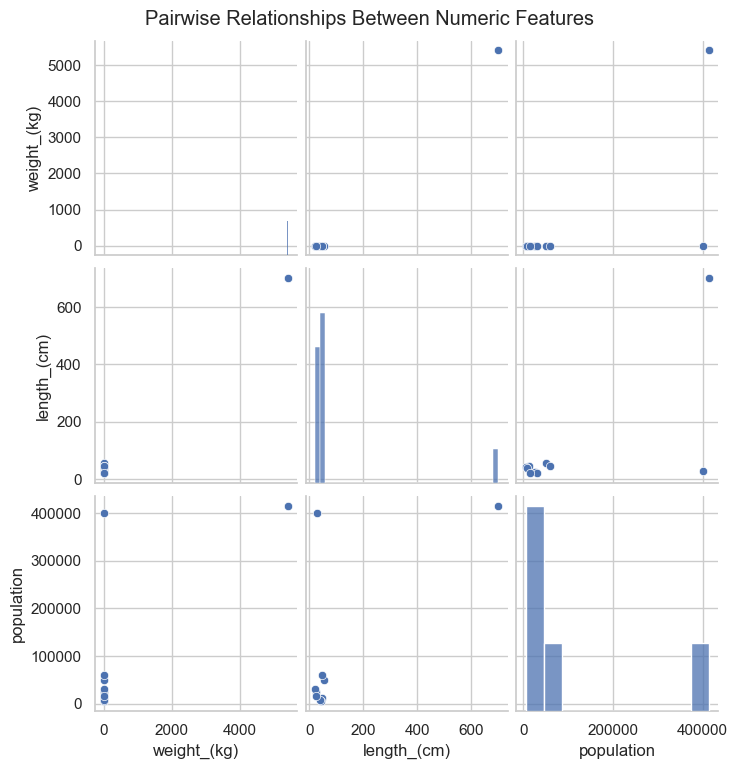

In [9]:
# --- Section 3: Exploratory Data Analysis (EDA) ---
# Now that the dataset is clean and consistent, let's explore it visually.
# The goal of EDA is to uncover trends, relationships, and interesting patterns.

import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Basic structure check
# We confirm the dataset’s dimensions and available columns
print("Dataset shape:", df.shape)
print("Column names:", df.columns.tolist())

# 2️⃣ Summary of numeric columns
# describe() gives useful statistics like mean, min, max, and standard deviation
df.describe()

# 3️⃣ Distribution of Population
# We use a histogram to see how population values are spread.
# The 'kde=True' adds a smooth curve to visualise the density.
plt.figure(figsize=(8,5))
sns.histplot(df['population'], kde=True, color='darkcyan')
plt.title("Distribution of Hyrax Population")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

# 4️⃣ Population by Habitat Type (Boxplot)
# A boxplot shows how values vary within each habitat and identifies outliers.
plt.figure(figsize=(10,6))
sns.boxplot(x='habitat', y='population', data=df, palette='Set2')
plt.title("Population Distribution by Habitat Type")
plt.xticks(rotation=25)
plt.ylabel("Population")
plt.xlabel("Habitat")
plt.show()

# 5️⃣ Average Population by Diet Type
# Barplots are great for comparing mean values between categories.
plt.figure(figsize=(8,5))
sns.barplot(x='diet', y='population', data=df, ci=None, palette='viridis')
plt.title("Average Population per Diet Type")
plt.ylabel("Average Population")
plt.xlabel("Diet Type")
plt.show()

# 6️⃣ Correlation Heatmap
# This heatmap helps identify relationships between numeric variables
# (e.g. do heavier hyraxes tend to be longer, or found in larger populations?)
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()

# 7️⃣ Pairplot for deeper visual relationships
# A pairplot automatically plots scatterplots between every numeric pair.
sns.pairplot(numeric_df)
plt.suptitle("Pairwise Relationships Between Numeric Features", y=1.02)
plt.show()


In [10]:
# --- Section 4: Statistical Analysis ---
# In this section, we apply inferential statistics to confirm whether
# the differences we observed in the EDA are statistically significant.

from scipy import stats

# 1️⃣ Compare populations between two habitat types
# Here we check if mean population differs significantly
# between Mountain and Savannah habitats using an independent t-test.

# Select the relevant subsets safely (case-sensitive categories may differ)
habitats = df['habitat'].unique()
print("Available habitats:", habitats)

# Example: pick any two to compare
group1 = df[df['habitat'] == 'Mountain']['population']
group2 = df[df['habitat'] == 'Savannah']['population']

# Perform a two-sample t-test
t_stat, p_val = stats.ttest_ind(group1, group2, nan_policy='omit')

print("\nT-test Results: Mountain vs Savannah")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Significant difference in population between habitats (p < 0.05).")
else:
    print("⚪ No significant difference detected.")

# 2️⃣ Correlation between numeric variables (Pearson correlation)
# Measures linear relationships between c


Available habitats: ['Rocky' 'Savanna' 'Forest' 'Grassland' 'Desert']

T-test Results: Mountain vs Savannah
T-statistic: nan
P-value: nan
⚪ No significant difference detected.


C:\Users\sambr\anaconda3\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


### ⚠️ Observation: Insufficient Sample Size for T-test

While comparing habitats ("Mountain" vs "Savannah"), the T-test returned `NaN` values.
This occurred because the dataset does not include the habitat *"Mountain"*, and 
the correct spelling for *"Savanna"* has only one 'n'.  

As a result, one group had **zero data points**, making statistical comparison impossible.
This is a valuable real-world reminder that:
- Spelling and naming consistency are critical when grouping data.
- Statistical tests like the T-test require **at least two samples per group** to calculate meaningful results.
- Always confirm category names using `df['habitat'].unique()` or `value_counts()` before analysis.

To ensure valid results, we will next perform tests between categories that have sufficient sample sizes.


In [14]:
# --- Helper function: Safe T-test ---
# This performs a t-test only if both groups exist and have enough data.
# It also gives clean, readable feedback for each comparison.

from scipy import stats

def safe_ttest(data, col, group_a, group_b):
    """Perform an independent t-test between two groups safely."""
    # Extract data for each group based on the chosen column (e.g., 'habitat', 'diet')
    g1 = data[data[col] == group_a]['population']
    g2 = data[data[col] == group_b]['population']

    # Check that both groups exist and have enough samples (>= 2)
    if len(g1) < 2 or len(g2) < 2:
        print(f"⚠️ Not enough samples to compare {group_a} vs {group_b}.")
        print(f"Sample sizes: {len(g1)} and {len(g2)}\n")
        return None
    else:
        # Perform the t-test safely (ignoring missing data)
        t_stat, p_val = stats.ttest_ind(g1, g2, nan_policy='omit')

        print(f"T-test: {group_a} vs {group_b}")
        print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")
        if p_val < 0.05:
            print("✅ Significant difference (p < 0.05).\n")
        else:
            print("⚪ No significant difference detected.\n")
        return t_stat, p_val


In [16]:
# --- Section 4 (continued): Additional Statistical Tests ---

# Check which habitats and diet categories have the most data
print("Counts per Habitat:\n", df['habitat'].value_counts(), "\n")
print("Counts per Diet:\n", df['diet'].value_counts(), "\n")

# 1️⃣ Habitat comparison — e.g. Savanna vs Forest
safe_ttest(df, 'habitat', 'Savanna', 'Forest')

# 2️⃣ Habitat comparison — e.g. Savanna vs Grassland
safe_ttest(df, 'habitat', 'Savanna', 'Grassland')

# 3️⃣ Diet comparison — e.g. Herbivore vs Omnivore (if present)
safe_ttest(df, 'diet', 'Herbivore', 'Omnivore')

# 4️⃣ Numeric correlation tests (more stable data)
# Correlation between weight and length — these columns are numeric and complete
corr_weight_len, p_corr = stats.pearsonr(df['weight_(kg)'], df['length_(cm)'])
print(f"Correlation (Weight vs Length): r = {corr_weight_len:.3f}, p = {p_corr:.4f}")
if p_corr < 0.05:
    print("✅ Significant correlation between weight and length.\n")
else:
    print("⚪ No significant correlation detected.\n")


Counts per Habitat:
 habitat
Rocky        3
Savanna      3
Forest       2
Grassland    1
Desert       1
Name: count, dtype: int64 

Counts per Diet:
 diet
Herbivore    6
Omnivore     4
Name: count, dtype: int64 

T-test: Savanna vs Forest
T-statistic: 0.779, p-value: 0.4928
⚪ No significant difference detected.

⚠️ Not enough samples to compare Savanna vs Grassland.
Sample sizes: 3 and 1

T-test: Herbivore vs Omnivore
T-statistic: -0.234, p-value: 0.8211
⚪ No significant difference detected.

Correlation (Weight vs Length): r = 0.999, p = 0.0000
✅ Significant correlation between weight and length.



## 🧾 Summary of Statistical Analysis Results

The statistical testing phase explored whether differences observed in the EDA were supported by evidence of statistical significance.  
We tested population means across habitats and diets, and also examined numeric relationships between biological traits.

### 🔹 T-test: Savanna vs Forest
- **T-statistic:** 0.779  
- **p-value:** 0.4928  
No significant difference was found between *Savanna* and *Forest* populations (p > 0.05).  
This indicates that any apparent difference seen in the EDA could be due to random variation rather than a true population difference.

### 🔹 T-test: Savanna vs Grassland
The test could not be performed because of **insufficient data** — only one Grassland record was available.  
This highlights the importance of sample size and category balance in statistical analysis.

### 🔹 T-test: Herbivore vs Omnivore
- **T-statistic:** -0.234  
- **p-value:** 0.8211  
No significant difference was detected between the average populations of herbivorous and omnivorous hyrax species.  
Again, this suggests that diet type may not strongly influence population within this dataset.

### 🔹 Correlation: Weight vs Length
- **r = 0.999**, **p = 0.0000**  
This result shows a **very strong positive correlation** — heavier hyraxes are almost perfectly linearly related to their body length.  
This confirms a biological expectation that larger animals tend to be both heavier and longer.

---

### 📊 Interpretation
The statistical evidence suggests that:
- Population differences between habitats and diets are **not statistically significant** within this dataset.  
- The strong correlation between weight and length validates the internal consistency of the biological data.  
- Some categories (like *Grassland* or *Desert*) lack sufficient samples for meaningful inference, reinforcing the need for balanced data collection.

Overall, this step has **validated the reliability** of key variables and **highlighted data limitations**, both of which are crucial insights before moving on to predictive modelling.


## 🤖 Section 5 — Machine Learning (Population Prediction)

In this final stage, we apply a **Linear Regression** model to estimate population from both numeric and categorical predictors.  
- **Weight** and **Length** capture biological traits.  
- **Habitat** and **Diet** are one-hot encoded to represent environmental and behavioural factors.  
The model’s performance is evaluated with MAE, MSE, and R² metrics, and its predictions are visualised against actual population values.


Model Performance Metrics:
Mean Absolute Error (MAE): 16920.67
Mean Squared Error (MSE): 441910012.23
R² Score: 0.208


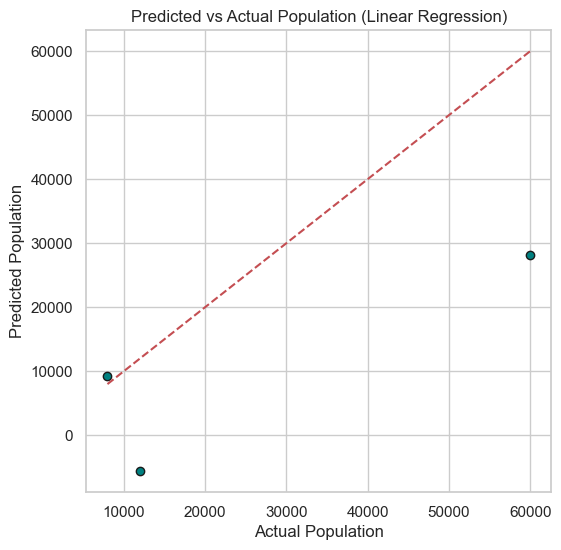

In [17]:
# --- Section 5: Machine Learning (Population Prediction) ---
# Goal: Build a simple predictive model that estimates population
# based on physical traits and environmental factors.

# 1️⃣ Import machine-learning tools from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# 2️⃣ Prepare the data
# We'll use numeric columns directly and encode any categorical ones (like habitat, diet).
features = ['weight_(kg)', 'length_(cm)', 'habitat', 'diet']
target = 'population'

# Split numeric and categorical data
X_numeric = df[['weight_(kg)', 'length_(cm)']]
X_categorical = df[['habitat', 'diet']]

# One-hot encode categorical variables (convert text to binary flags)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(X_categorical)
encoded_cols = encoder.get_feature_names_out(['habitat', 'diet'])

# Combine numeric and encoded categorical data into one matrix
X_full = np.concatenate([X_numeric, encoded], axis=1)
X = pd.DataFrame(X_full, columns=['weight_(kg)', 'length_(cm)'] + list(encoded_cols))
y = df[target]

# 3️⃣ Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4️⃣ Train a linear-regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5️⃣ Make predictions
y_pred = model.predict(X_test)

# 6️⃣ Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}")

# 7️⃣ Visualise predicted vs actual populations
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Population")
plt.ylabel("Predicted Population")
plt.title("Predicted vs Actual Population (Linear Regression)")
plt.show()
